# **Practice Assignment - Part 1: Analyzing wildfire activities in Australia** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
data_wf=pd.read_csv('datasets/Historical_Wildfires.csv')
data_wf

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N


In [6]:
data_wf.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [26]:
import datetime as dt
data_wf['Year']=pd.to_datetime(data_wf['Date']).dt.year
data_wf['Month'] = pd.to_datetime(data_wf['Date']).dt.month

# Practice Task
### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


In [28]:
data_avg_fire=data_wf.groupby(['Year'])['Estimated_fire_area'].mean()
data_avg_fire

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
2010     62.429968
2011    266.936175
2012    265.526196
2013     95.896092
2014    144.007348
2015    133.196719
2016     82.674717
2017    156.060061
2018    162.030426
2019    160.607150
2020     72.669665
Name: Estimated_fire_area, dtype: float64

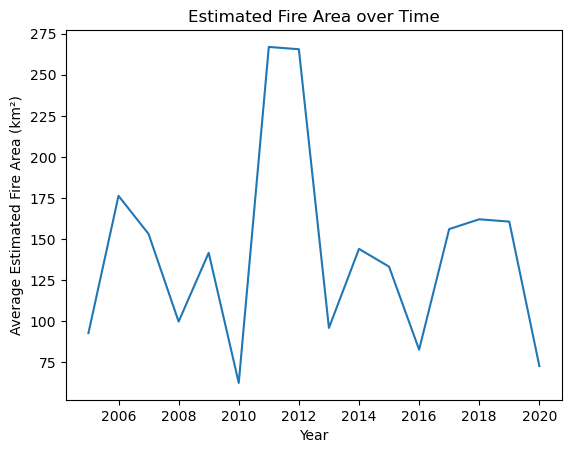

In [13]:
data_avg_fire.plot(x=data_avg_fire.index,y=data_avg_fire.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

In [73]:
data_avg_fire_month=data_wf.groupby(['Year','Month'])['Estimated_fire_area'].mean()
# data_avg_fire_month=data_avg_fire_month[(data_avg_fire_month['Year']>=2010) & (data_avg_fire_month['Year']<=2013)]
# data_avg_fire_month.set_index(['Year','Month'])
data_avg_fire_month.index

MultiIndex([(2005,  1),
            (2005,  2),
            (2005,  3),
            (2005,  4),
            (2005,  5),
            (2005,  6),
            (2005,  7),
            (2005,  8),
            (2005,  9),
            (2005, 10),
            ...
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6),
            (2020,  7),
            (2020,  8),
            (2020,  9),
            (2020, 10)],
           names=['Year', 'Month'], length=190)

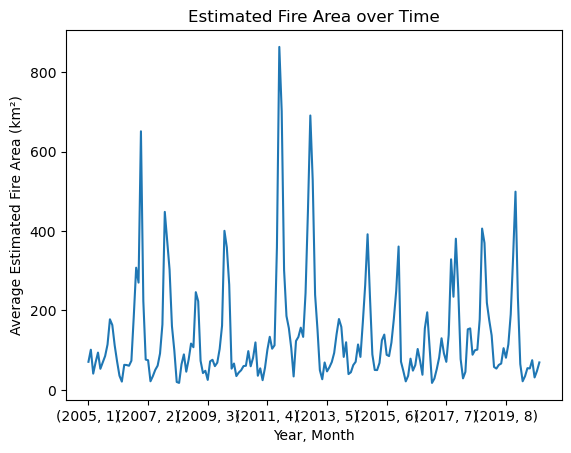

In [74]:
data_avg_fire_month.plot(x=data_avg_fire_month.index,y='Estimated_fire_area')
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot

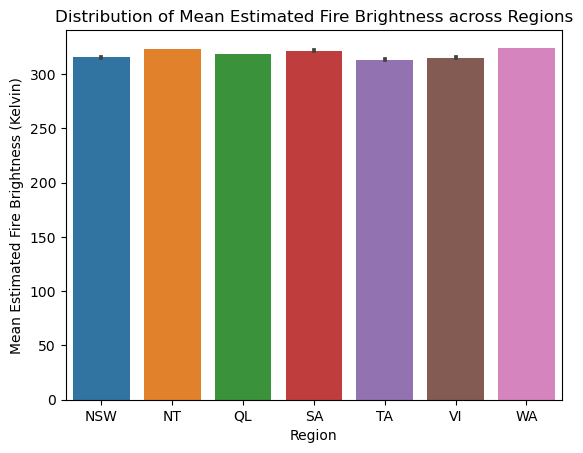

In [80]:
# data_wf[['Mean_estimated_fire_brightness','Region']]
data1=data_wf.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()
sns.barplot(data=data_wf,x='Region',y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this

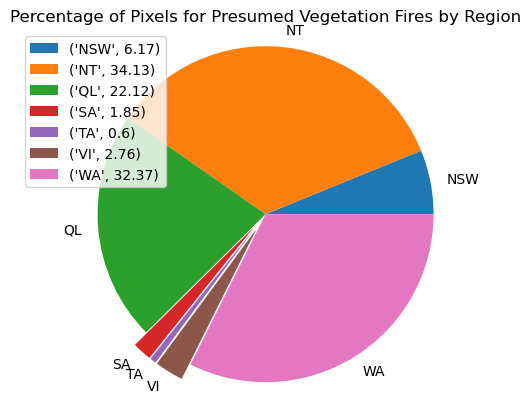

In [99]:
region_counts=data_wf.groupby('Region')['Count'].sum()
plt.pie(region_counts,labels=region_counts.index,explode=(0, 0, 0, 0.1,0.1,0.1,0))
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

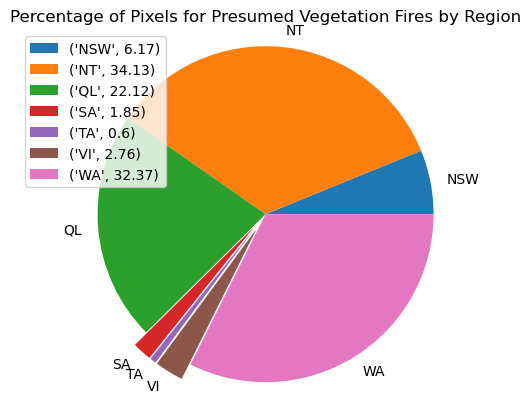

In [100]:
region_counts=data_wf.groupby('Region')['Count'].sum()
plt.pie(region_counts,labels=region_counts.index,explode=(0, 0, 0, 0.1,0.1,0.1,0))
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram

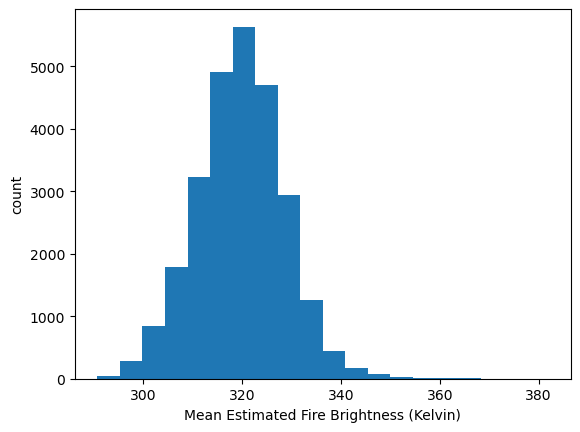

In [108]:
data_wf[['Mean_estimated_fire_brightness']]
plt.hist(data_wf['Mean_estimated_fire_brightness'],bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('count')
plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like,

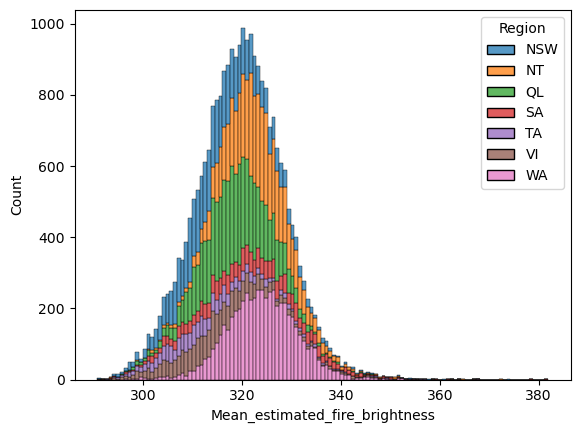

In [111]:
sns.histplot(data=data_wf,x='Mean_estimated_fire_brightness',hue='Region',multiple='stack')
plt.show()

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

<Axes: xlabel='Mean_confidence', ylabel='Mean_estimated_fire_radiative_power'>

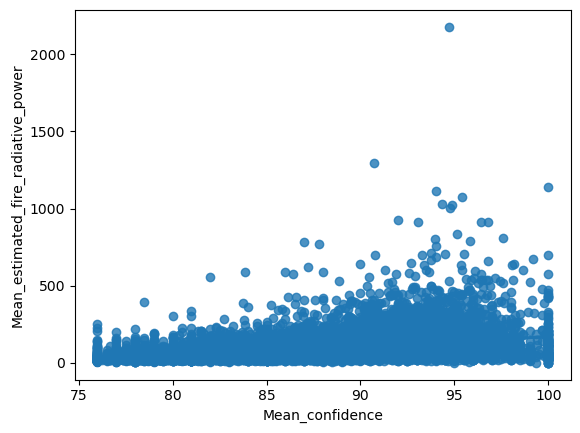

In [112]:
sns.regplot(data=data_wf,x='Mean_confidence',y='Mean_estimated_fire_radiative_power')

In [113]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [119]:
aus_location=folium.map.FeatureGroup()

aus_reg=folium.Map(
    location=[-23.256588515654133, 134.00820968779354],
    zoom_start=4
)
for lat,long,lab in zip(reg['Lat'],reg['Lon'],reg['region']):
    aus_location.add_child(
        folium.features.CircleMarker(
            [lat,long],
            popup=lab,
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    folium.Marker([lat,long],popup=lab).add_to(aus_reg)
aus_reg.add_child(aus_location)

# creating dashboard
    - dash object
    - layout 
    - call backfunction to update
    - run server

In [121]:
import pandas as pd
import dash
from dash import html, dcc
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input,Output

In [122]:
app=dash.Dash(__name__)